Akhil Naive Bayes Trial

In [9]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn as sk
import scipy as sp
from scipy import signal
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier

Specify the experimental data you would like to load, and make sure this script has access to it.

In [10]:
#labels
    #fall = 1
    #impact = 2
    #nothing = 3
    
#falldata
string = "/Users/Andrew/Documents/GitHub/Tensegrity-HRI/fall"
numbers = np.arange(1,15)
data = []
for num in numbers:
    filename = string + str(num) + '.csv'
    d = pd.read_csv(filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
    d = d.drop(columns = ["IND", "time"])
    d = d.to_numpy()
    data.append(d)

    

    



In [11]:
#impactdata added
string = "/Users/Andrew/Documents/GitHub/Tensegrity-HRI/impact"
numbers = np.arange(1,15)
for num in numbers:
    filename = string + str(num) + '.csv'
    d = pd.read_csv(filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
    d = d.drop(columns = ["IND", "time"])
    d = d.to_numpy()
    data.append(d)

    
#nothingdata added
string = "/Users/Andrew/Documents/GitHub/Tensegrity-HRI/nothing"
numbers = np.arange(1,15)
for num in numbers:
    filename = string + str(num) + '.csv'
    d = pd.read_csv(filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
    d = d.drop(columns = ["IND", "time"])
    d = d.to_numpy()
    data.append(d)
    
l1 = np.ones((14,), dtype=int) 
l2 = 2*np.ones((14,), dtype=int) 
l3 =  3*np.ones((14,), dtype=int)
labels = np.concatenate((l1, l2, l3), axis=0)

print(np.shape(data))
print(np.shape(labels))





(42, 1001, 15)
(42,)


In [13]:
nsamples, nx, ny = np.shape(data)
reformated_data = np.reshape(data,(nsamples, nx*ny))
[X_train, X_test, y_train, y_test] = train_test_split(reformated_data, labels, random_state=0)
model = GaussianNB().fit(X_train, y_train)
#model = GaussianNB().fit(reformated_data, labels)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print("Predicted labels = " + str(model.predict(X_test)))
print("Correct labels =   " + str(y_test))



1.0
0.7272727272727273
Predicted labels = [3 3 2 3 1 2 2 3 3 3 3]
Correct labels =   [3 3 2 1 1 2 3 1 3 3 3]


In [ ]:
# An example plot of force data over time
fsr_data.plot(figsize=(15,10))

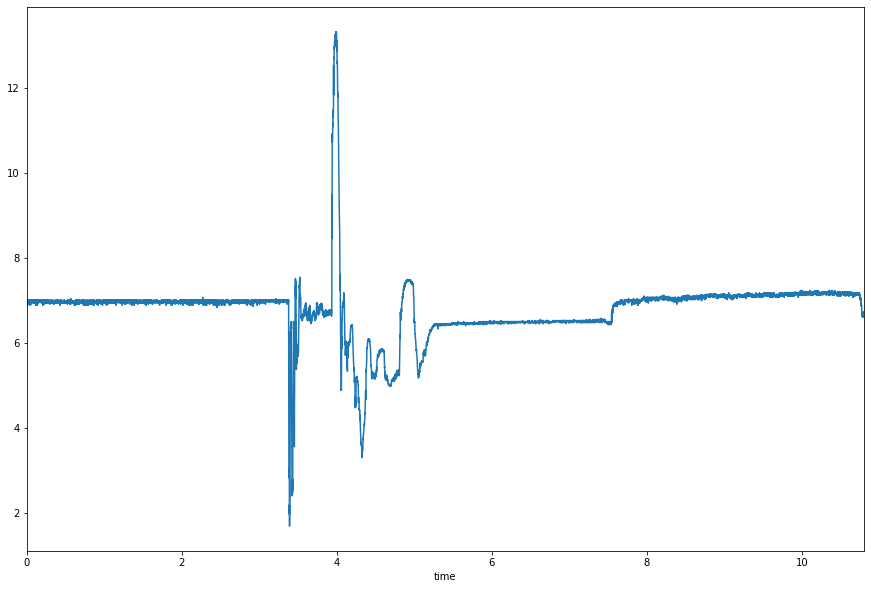

In [99]:
fsr_data["FSR_2"].plot(figsize=(15,10))

In [100]:
# Attempt to take a filtered derivative
dydx = signal.savgol_filter(fsr_data["FSR_2"].values, 101, 2, deriv=1, delta=0.001)

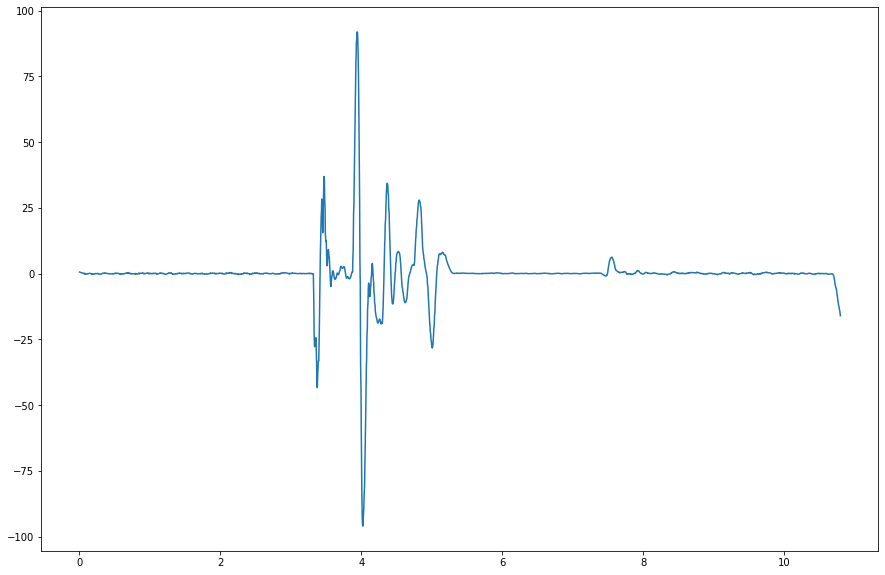

In [101]:
figure(figsize=(15, 10))
plt.plot(fsr_data.index.values, dydx)
#plt.plot(fsr_data.index.values, fsr_data["FSR_2"].values)

In [ ]:
fsr_data.head()